In [34]:
from model.vae import vae

import yaml
import torch
import matplotlib.pyplot as plt

with open("config.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
model = vae(config)
ckpt = torch.load("./checkpoints/baseline/last.ckpt")["state_dict"]
for k in list(ckpt.keys()):
    if "model." in k:
        ckpt[k.replace("model.", "")] = ckpt[k]
        del ckpt[k]

In [35]:
model.load_state_dict(ckpt)

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


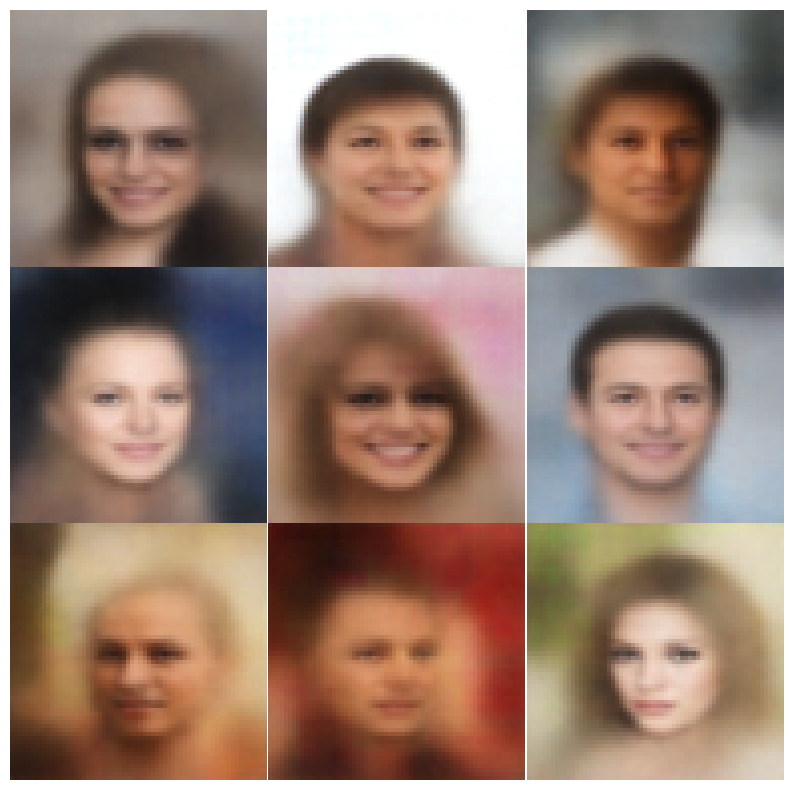

In [36]:
model.eval()
result = model.sample(9)


def de_normal(x):
    return 3 * x * torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1) + torch.tensor(
        [0.485, 0.456, 0.406]
    ).view(1, 3, 1, 1)


plt.rcParams["figure.figsize"] = (10, 10)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(de_normal(result)[i].permute(1, 2, 0).detach().numpy())